Submission Proyek Akhir : Membuat Model Sistem Rekomendasi

---


Modul : Machine Learning Terapan

---


Nama / ID Dicoding : Endricho Abednego / M239X0468





## Import Library
Melakukan import library yang berguna untuk memanggil fungsi-fungsi yang diperlukan untuk algoritma model 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import ast
import nltk 
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
! pip install kaggle
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Zip Extraction 
Dataset di yang telah di install masih berupa zip, sehingga diperlukan zip extraction supaya dapat dibaca oleh sistem.

In [4]:
! kaggle datasets download gazu468/tmdb-10000-movies-dataset

 84% 40.0M/47.9M [00:00<00:00, 150MB/s]
100% 47.9M/47.9M [00:00<00:00, 143MB/s]


In [5]:
! unzip tmdb-10000-movies-dataset.zip

Archive:  tmdb-10000-movies-dataset.zip
  inflating: 10000 Credits Data      
  inflating: 10000 Movies Data       
  inflating: __notebook_source__.ipynb  


## Load Dataset
Setelah dataset telah di unzip dan terekstrasi maka dataset perlu di load ke dalam memori dengan pembacaan file. 

In [63]:
film = pd.read_csv("/content/10000 Movies Data")
dataFilm = pd.read_csv("/content/10000 Movies Data")
kredit = pd .read_csv("/content/10000 Credits Data")

In [64]:
kredit.drop("title",axis=1, inplace=True)


##File Merge Dataset
Perlu dilakukan merge dataset untuk pengolahan data karena pada dataset ini terdaat 2 files yaitu 10000 Movies Data dan 10000 Credits Data dengan menggunakan fungsi merge()

In [65]:
film=film.merge(kredit, on="Movie_id")

In [66]:
film.head(5)


,Unnamed: 0_x,Movie_id,title,Genres,release_date,Keywords,overview,poster_path,Budget,Revenue,popularity,vote_average,vote_count,Unnamed: 0_y,Cast,Crew
0,0,238,The Godfather,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1972-03-14,"[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...","Spanning the years 1945 to 1955, a chronicle o...",/3bhkrj58Vtu7enYsRolD1fZdja1.jpg,245066411,245066411,93.552,8.7,16814,0,"[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,1,278,The Shawshank Redemption,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1994-09-23,"[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",Framed in the 1940s for the double murder of h...,/q6y0Go1tsGEsmtFryDOJo3dEmqu.jpg,28341469,28341469,78.664,8.7,22542,1,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,2,240,The Godfather Part II,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",1974-12-20,"[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...",In the continuing saga of the Corleone crime f...,/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg,102600000,102600000,55.752,8.6,10187,2,"[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,3,19404,Dilwale Dulhania Le Jayenge,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-10-19,[],"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg,100000000,100000000,22.150,8.6,3927,3,"[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."
4,4,424,Schindler's List,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1993-12-15,"[{'id': 818, 'name': 'based on novel or book'}...",The true story of how businessman Oskar Schind...,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg,321365567,321365567,53.542,8.6,13382,4,"[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."


In [67]:
film=film[['Movie_id','title','Genres',"Keywords",'overview','Cast','Crew']]


In [68]:
film.isnull().sum()

Movie_id    0
title       0
Genres      0
Keywords    0
overview    6
Cast        0
Crew        0
dtype: int64

#Menghilangakan data yang bernilai Null

In [69]:
film.dropna(inplace=True)
film.duplicated().sum()

0

#Melakukan convert string menjadi list

In [70]:
ast.literal_eval

<function ast.literal_eval(node_or_string)>

In [71]:
def convertString1(obj):
    L =[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [72]:
film['Genres'] = film['Genres'].apply(convertString1)
film.head()

,Movie_id,title,Genres,Keywords,overview,Cast,Crew
0,238,The Godfather,"[Drama, Crime]","[{'id': 131, 'name': 'italy'}, {'id': 697, 'na...","Spanning the years 1945 to 1955, a chronicle o...","[{'adult': False, 'gender': 2, 'id': 3084, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
1,278,The Shawshank Redemption,"[Drama, Crime]","[{'id': 378, 'name': 'prison'}, {'id': 417, 'n...",Framed in the 1940s for the double murder of h...,"[{'adult': False, 'gender': 2, 'id': 504, 'kno...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
2,240,The Godfather Part II,"[Drama, Crime]","[{'id': 131, 'name': 'italy'}, {'id': 700, 'na...",In the continuing saga of the Corleone crime f...,"[{'adult': False, 'gender': 2, 'id': 1158, 'kn...","[{'adult': False, 'gender': 2, 'id': 154, 'kno..."
3,19404,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",[],"Raj is a rich, carefree, happy-go-lucky second...","[{'adult': False, 'gender': 2, 'id': 35742, 'k...","[{'adult': False, 'gender': 1, 'id': 8311, 'kn..."
4,424,Schindler's List,"[Drama, History, War]","[{'id': 818, 'name': 'based on novel or book'}...",The true story of how businessman Oskar Schind...,"[{'adult': False, 'gender': 2, 'id': 3896, 'kn...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."


In [73]:
film['Keywords']=film['Keywords'].apply(convertString1)

In [74]:
def convertString2(obj):
    L =[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter !=3:
            L.append(i['name'])
            counter+=1
    return L

In [75]:
film['Cast']=film['Cast'].apply(convertString2)

In [76]:
def fetch(obj):
    L =[]
    for i in ast.literal_eval(obj):
        if i['job']=="Director":
            L.append(i['name'])
            break
    return L

In [77]:
film['Crew']=film['Crew'].apply(fetch)

In [78]:
film['overview']=film['overview'].apply(lambda x: x.split())

In [79]:

film['Genres']=film['Genres'].apply(lambda x : [i.replace(" ","")for i in x])
film['Keywords']=film['Keywords'].apply(lambda x : [i.replace(" ","")for i in x])
film['Cast']=film['Cast'].apply(lambda x : [i.replace(" ","")for i in x])
film['Crew']=film['Crew'].apply(lambda x : [i.replace(" ","")for i in x])

Penambahan kolom 'tags' dalam dataset yang berisi gabungan dari kolom *'Genres','Keywords','Cast','Crew','overview'* untuk proses penghitungan kata dalam algoritma *Bag of Words*

In [80]:
film['tags']= film['Genres'] + film['Keywords'] + film['Cast'] + film['Crew'] + film['overview']


In [81]:
film.head(5)

,Movie_id,title,Genres,Keywords,overview,Cast,Crew,tags
0,238,The Godfather,"[Drama, Crime]","[italy, lossoflovedone, loveatfirstsight, base...","[Spanning, the, years, 1945, to, 1955,, a, chr...","[MarlonBrando, AlPacino, JamesCaan]",[FrancisFordCoppola],"[Drama, Crime, italy, lossoflovedone, loveatfi..."
1,278,The Shawshank Redemption,"[Drama, Crime]","[prison, corruption, policebrutality, basedonn...","[Framed, in, the, 1940s, for, the, double, mur...","[TimRobbins, MorganFreeman, BobGunton]",[FrankDarabont],"[Drama, Crime, prison, corruption, policebruta..."
2,240,The Godfather Part II,"[Drama, Crime]","[italy, italianamerican, cuba, symbolism, gang...","[In, the, continuing, saga, of, the, Corleone,...","[AlPacino, RobertDuvall, DianeKeaton]",[FrancisFordCoppola],"[Drama, Crime, italy, italianamerican, cuba, s..."
3,19404,Dilwale Dulhania Le Jayenge,"[Comedy, Drama, Romance]",[],"[Raj, is, a, rich,, carefree,, happy-go-lucky,...","[ShahRukhKhan, Kajol, AmrishPuri]",[AdityaChopra],"[Comedy, Drama, Romance, ShahRukhKhan, Kajol, ..."
4,424,Schindler's List,"[Drama, History, War]","[basedonnovelorbook, factory, concentrationcam...","[The, true, story, of, how, businessman, Oskar...","[LiamNeeson, BenKingsley, RalphFiennes]",[StevenSpielberg],"[Drama, History, War, basedonnovelorbook, fact..."


In [82]:
df = film[['Movie_id','title','tags']]

In [83]:
df['tags']=df['tags'].apply(lambda x: " ".join(x))
df['tags']=df['tags'].apply(lambda x: x.lower())

# Visualisasi Data
Grafik berikut menunjukan 15 film terpopuler yang ada dalam dataset

Text(0.5, 1.0, 'Film Terpopuler')

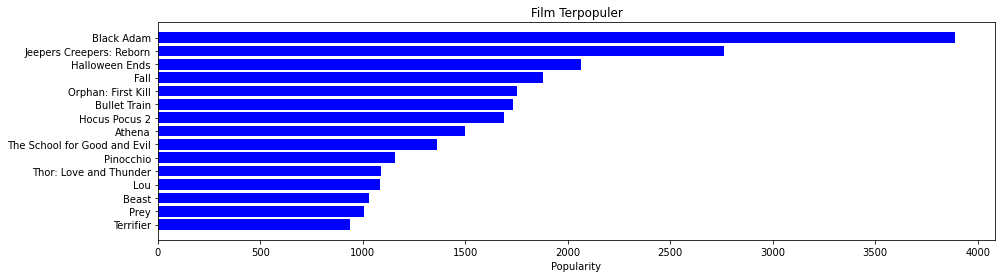

In [84]:
pop= dataFilm.sort_values('popularity', ascending=False)
plt.figure(figsize=(15,4))

plt.barh(pop['title'].head(15),pop['popularity'].head(15), align='center', color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Film Terpopuler")

##Modeling
Proses pembuatan sistem rekomendasi menggunakan metode pendekatan content based filtering. Pada model ini, akan digunakan TF-IDF Vectorizer. Teknik tersebut berfungsi untuk menemukan fitur penting dari setiap kategori penting.

#Stemming
Melakukan penghapusan beberapa akhir karakter dalam sebuah kata.

In [85]:
nltk.download('wordnet')
ps = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [86]:
def stemming(text):
    y=[]
    for i in text.split():
        y.append (ps.stem(i))
    return " ".join(y)



In [87]:
#lemmitization
df['tags1']=df['tags'].apply(stemming)
#porter_steammer
df['tags']=df['tags'].apply(stemming)

Melakukan CounterVectorizer dengan porterSteamer

In [88]:

countVect= CountVectorizer(max_features=8000, stop_words="english")
vector=countVect.fit_transform(df['tags']).toarray()
#cek nama fitur random
countVect.get_feature_names()[1200]

'charltonheston'

melakukan proses TFIDF menggunakan lemmitization

In [89]:
tfVect=TfidfVectorizer(max_features=7000,analyzer='word',stop_words="english")
tfdf_features=tfVect.fit_transform(df['tags1'])
tfVect.get_feature_names_out()[1322] 

'command'

Proses transformasi data untuk mengubah data ke dalam bentuk matriks

In [90]:
dataFilm['overview'] = dataFilm['overview'].fillna('')
tfidf_matrix = tfVect.fit_transform(dataFilm['overview'])
tfidf_matrix.shape

(9980, 7000)

Kemudian untuk menghasilkan vektor tf-idf dalam bentuk matriks kita akan memanggil fungsi todense()

In [91]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [92]:
tfidf_matrix

<9980x7000 sparse matrix of type '<class 'numpy.float64'>'
	with 199736 stored elements in Compressed Sparse Row format>

#Cosine Similarity
Pada tahap ini, akan dipanggil fungsi cosine_similarity() yang berfungsi untuk menghitung derajat kesamaan.

In [93]:
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.00681656, 0.43532658, ..., 0.01219453, 0.00350699,
        0.12261519],
       [0.00681656, 1.        , 0.00793684, ..., 0.01158056, 0.01275244,
        0.        ],
       [0.43532658, 0.00793684, 1.        , ..., 0.02258194, 0.        ,
        0.05830917],
       ...,
       [0.01219453, 0.01158056, 0.02258194, ..., 1.        , 0.00696861,
        0.03519705],
       [0.00350699, 0.01275244, 0.        , ..., 0.00696861, 1.        ,
        0.        ],
       [0.12261519, 0.        , 0.05830917, ..., 0.03519705, 0.        ,
        1.        ]])

In [94]:
similarity = cosine_similarity(vector)

In [95]:
df[df['title']=='Avatar'].index[0]

1266

In [96]:
indices = pd.Series(dataFilm.index, index=dataFilm['title']).drop_duplicates()

In [97]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=dataFilm['title'], columns=dataFilm['title'])
print('Shape:', cosine_sim_df.shape)

Shape: (9980, 9980)


Algoritma model dengan Bag of Words

In [98]:
def reccomendBoW(movie):
    movie_index=df[df['title']==movie].index[0]
    distance=similarity[movie_index]
    movies_list=sorted(list(enumerate(distance)), reverse=True, key=lambda x : x[1])[1:17]
    
    for i in movies_list:
        print(df.iloc[i[0]].title)
    

In [99]:
reccomendBoW('Batman Begins')


The Dark Knight
The Batman
Batman: Bad Blood
Batman
The Raid 2
Batman: Under the Red Hood
Spider-Man: Homecoming
Don
The Dark Knight Rises
Pain and Glory
The Heir Apparent: Largo Winch
Sorry If I Call You Love
Batman: Gotham by Gaslight
Batman: The Dark Knight Returns, Part 1
Twelve
Sound of Metal


Algroitma model dengan Content Based Filtering 


In [100]:
def reccomendCBF(movie, similarity_data=cosine_sim_df, items=dataFilm[['title',]], k=15):

    index = similarity_data.loc[:,movie].to_numpy().argpartition(range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    closest = closest.drop(movie, errors='ignore')
 
    return pd.DataFrame(closest).merge(items)

In [101]:
reccomendCBF('Batman Begins')

,title
0,Batman: Bad Blood
1,"Batman: The Dark Knight Returns, Part 1"
2,Batman: Mask of the Phantasm
3,The Batman
4,Batman
5,Batman
6,Batman: Year One
7,The Lego Batman Movie
8,Batman: Hush
9,Batman: Gotham by Gaslight
